# COGS 118A- Project Checkpoint

## Names

- Tai Le
- Stefanie Dao
- Yepeng Li
- Cheng Chang
- Matthew Chong

## Abstract (TODO + NEED TO PORT FROM PROPOSAL)
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents and how they are measured
- what you will be doing with the data
- how performance/success will be measured

## Background (NEED TO PORT FROM PROPOSAL)

Fill in the background and discuss the kind of prior work that has gone on in this research area here. **Use inline citation** to specify which references support which statements.  You can do that through HTML footnotes (demonstrated here). I used to reccommend Markdown footnotes (google is your friend) because they are simpler but recently I have had some problems with them working for me whereas HTML ones always work so far. So use the method that works for you, but do use inline citations.

Here is an example of inline citation. After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds<a name="lorenz"></a>[<sup>[1]</sup>](#lorenznote). Use a minimum of 2 or 3 citations, but we prefer more <a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). You need enough citations to fully explain and back up important facts. 

Remeber you are trying to explain why someone would want to answer your question or why your hypothesis is in the form that you've stated. 

## Problem Statement (NEED TO PORT FROM PROPOSAL)

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

## Data

### Dataset Introduction

- Our main dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD). https://biolincc.nhlbi.nih.gov/studies/framcohort/. 
  - The dataset provides the patients’ information, which includes over 4,000 records and 15 attributes
  - Each observation consists of basic demographic and medical information of each patient
  - Some critical variables are 
    - Sex: male or female (Nominal)
    - Age: Age of the patient(Numerical)
    - Cigs Per Day: the number of cigarettes that the person smoked on average in one day(Numerical)
    - Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    - Sys BP: systolic blood pressure (Numerical)
    - Dia BP: diastolic blood pressure (Numerical)
    - Heart Rate (Numerical)
    - 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
  - From what we observed, we might need to encode nominal and binary data with one-hot encoding. Before training, we also need to normialize our data and find a way handle imbalanced data if later we discover that the data is highly imbalanced.

### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
#from sklearn.pipeline import Pipeline
#import matplotlib.pyplot as plt
#from sklearn.preprocessing import normalize

# For reproducibility
RAND_STATE = 42

### Data Cleaning

We first do some basic cleaning.

In [2]:
# Get data
data = pd.read_csv('data/CHD_preprocessed.csv')

# Renaming the column names
cols = ['male', 'age', 'education', 'smoker', 'cigs', 
        'bpmeds', 'stroke', 'hypertension', 'diabetes',
        'cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate',
        'glucose', 'chd']
data.columns = cols

data

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


Since the dataset is already cleaned and properly coded, we will not perform any further cleaning.

### Exploratory Data Analysis (EDA)

Below is the general statistics of this dataset.

In [3]:
data.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Let's look at the statistics of individual classes:

In [4]:
positive = data[data['chd'] == 1]
negative = data[data['chd'] == 0]

In [5]:
positive.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.000000,628.0
mean,0.525478,54.173567,0.251592,0.514331,10.581210,0.074841,0.017516,0.507962,0.062102,245.307325,143.774682,86.995223,26.472812,76.507962,88.345541,1.0
std,0.499749,8.008178,0.434274,0.500193,12.961165,0.263344,0.131288,0.500335,0.241533,47.873133,26.851766,14.137369,4.454779,12.231614,39.501560,0.0
min,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,50.000000,40.000000,1.0
25%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214.000000,125.000000,78.000000,23.580000,68.000000,73.000000,1.0
50%,1.000000,55.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,241.000000,139.000000,85.000000,26.050000,75.000000,80.000000,1.0
75%,1.000000,61.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,271.000000,158.000000,95.000000,28.852500,84.250000,88.250000,1.0
max,1.000000,70.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,140.000000,56.800000,120.000000,394.000000,1.0


In [6]:
negative.describe()

,male,age,education,smoker,cigs,bpmeds,stroke,hypertension,diabetes,cholesterol,sysbp,diabp,bmi,heartrate,glucose,chd
count,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.000000,3505.0
mean,0.409700,48.730100,0.285877,0.491298,8.836519,0.027104,0.003994,0.275892,0.019116,235.115835,130.323110,82.133524,25.654182,75.820827,80.800000,0.0
std,0.491849,8.394026,0.451896,0.499996,11.704058,0.162410,0.063083,0.447026,0.136951,42.984636,20.454837,11.362873,3.990325,12.014991,18.122512,0.0
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.0
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.980000,68.000000,72.000000,0.0
50%,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,127.000000,81.000000,25.230000,75.000000,79.000000,0.0
75%,1.000000,55.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,141.000000,88.000000,27.830000,83.000000,85.000000,0.0
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,453.000000,243.000000,142.500000,51.280000,143.000000,386.000000,0.0


This provides us a general feel of the relationship between the classes. From the above statistics, we can see that the positive class on average has a higher heart rate, cigaretts smoke, glucose, and cholesterol level. However, we need to also keep in mind the count of each class (this dataset is not balanced), which will be discussed later.

Let's make some quick visualizations of a few variables:

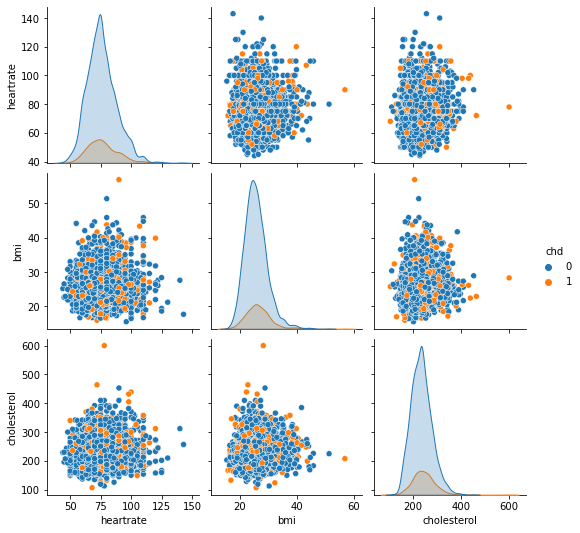

In [7]:
d1 = data[['heartrate', 'bmi', 'cholesterol', 'chd']]

sns.pairplot(d1, hue='chd')

From the above pairplot, we can see how the height of the distributions of heart rate, BMI, and cholesterol level is generally shorter for people with 10-year risk of corollary heart disease. However, there might be some external factors that contributed to the difference in those distributions. Let's first look at the mean from each class:

In [8]:
print("Mean heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].mean())
print("Mean heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].mean())

print("Max heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].max())
print("Max heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].max())

print("Median heart rate for negative class: ", d1['heartrate'][d1['chd'] == 0].median())
print("Median heart rate for positive class: ", d1['heartrate'][d1['chd'] == 1].median())

Mean heart rate for negative class:  75.82082738944365
Mean heart rate for positive class:  76.50796178343948
Max heart rate for negative class:  143.0
Max heart rate for positive class:  120.0
Median heart rate for negative class:  75.0
Median heart rate for positive class:  75.0


We can see that the statistics of both classes are very similar. Thus, the difference in distributions can be explained by the density of each class given that we saw how there are way more people in the negative class. In other words, the taller density distribution of the negative class around the mean simply means that there are more data points of that class.

Let's quickly look at the distribution of the classes:

<AxesSubplot:>

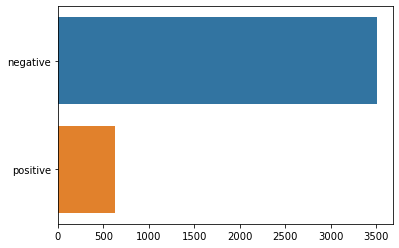

In [9]:
sns.barplot(x=data['chd'].value_counts().values, y=['negative', 'positive'], orient='h')

We can see that the distribution pof classes is heavily uneven and there are way more negative than positive classes.

Now, let us sample 500 data points from each class and re-plot the pairplot:

In [10]:
negative_indices = np.array(d1['chd'][d1['chd'] == 0].sample(n=500).index)
positive_indices = np.array(d1['chd'][d1['chd'] == 1].sample(n=500).index)
indices = np.append(negative_indices, positive_indices)
d2 = data[['heartrate', 'bmi', 'cholesterol', 'chd']].to_numpy()[indices]

In [11]:
d2.shape

(1000, 4)

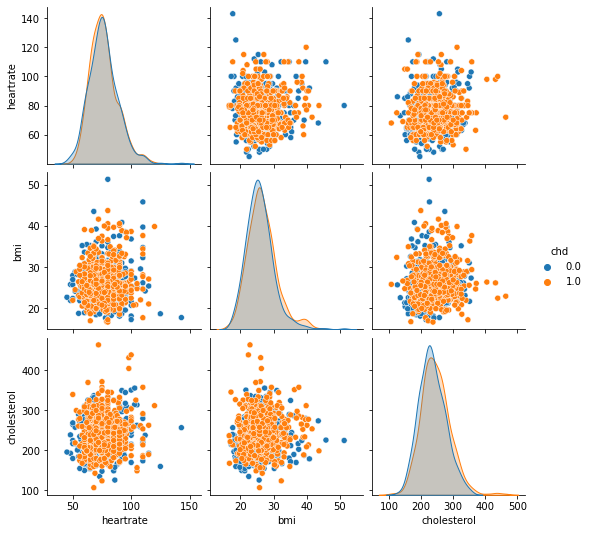

In [12]:
d2 = pd.DataFrame(d2, columns=['heartrate', 'bmi', 'cholesterol', 'chd'])

sns.pairplot(d2, hue='chd')

Here, we can see that the density distributions both classes are very similar which matches our expectation using the statistics earlier. However, this doesn't tell us anything useful since the distributions are similar and there is little to no correlation between the variables. Let's add a few more variables.

In [ ]:
d3 = data[['age', 'cigs','cholesterol', 'sysbp', 'diabp', 'bmi', 'heartrate', 'glucose', 'chd']]

sns.pairplot(d3, hue='chd')

By just eyeballing the plots, we can see that there might be some positive correlation between systolic blood pressure (sysbp) and diastolic blood pressure (diabp). Let's get the correlation coefficient for each variable:

In [ ]:
d3.corr()

There is indeed a positive correlation between sysbp and diabp. However, upon looking at their definitions, they seem to be measuring blood presure at different states of the heart (beating and resting). Thus, further research is necessary to determine the significance of this correlation.

## Proposed Solution (NEED TO PORT FROM PROPOSAL)

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

## Evaluation Metrics (NEED TO PORT FROM PROPOSAL)

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

## Preliminary results

We should try models that are used for supervised binary classification tasks. Specifically, it would be interesting to test out models such as some kind of decision trees, support vector machine, logistic regression, and K-nearest neightbors. However, KNN here might not be an optimal solution to the problem due to the relatively high dimensionality our original data has. Therefore, we may need to use models that are less susceptible to the "curse of dimensionality".

### Preprocessing

We first take out the feature (chd) to be classified and do the train-test split. Because the distribution between class 0 and 1 is uneven, we need to use a stratified split.

In [ ]:
X = data.drop("chd", axis=1)
y = np.array(data["chd"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RAND_STATE, 
                                                    stratify=y)
# Check stratify result
print("training split class 1 ratio", 
      sum(y_train) / len(y_train))
print("testing split class 1 ratio", 
      sum(y_test) / len(y_test))

### Feature Selection

As we can see in the EDA section, there are many features presented in this data that does seem to have a significantly different distrbution between the two groups that we want to classify. Therefore, we want to try some feature selection techniques over this data before selecting the appropiate classification model.

We try an L1-based feature selection first. This selection technique directly removes features that does not provide a significant conitrbution to the classification power of the naive model (logistic regression) that we are using.

In [ ]:
# Check different regularization strength
reg_strength_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]

# Fit a logistic regression model with these different strength, 
# get average CV scores from each of them
avg_cv_score_list = []
for reg_strength in reg_strength_list:
    lr = LogisticRegression(penalty="l1", C=reg_strength, solver="liblinear")
    cv_score_list = cross_val_score(lr, X_train, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best C strength
best_reg_idx = np.argmax(avg_cv_score_list)
best_c = reg_strength_list[best_reg_idx]

# Use the best C to fit model and select features, make new feature array 
# with only those features
lr = LogisticRegression(penalty="l1", C=best_c, solver="liblinear")
selector = SelectFromModel(estimator=lr).fit(X_train, y_train)
X_train_l1 = selector.transform(X_train)

print("Before selection", X_train.shape)
print("After selection", X_train_l1.shape)

Surprisingly, L1 feature selection result suggests that all features should be kept for the approximated best performance of a logistic regression.

Now we use pricipal component analysis (PCA) to make another attempt at model selection, and see what PCA would tell us to do.

In [ ]:
keep_dim_list = [8, 9, 10, 11, 12, 13, 14, 15]

avg_cv_score_list = []
for keep_dim in keep_dim_list:
    pca = PCA(n_components=keep_dim, random_state=RAND_STATE)
    X_train_new = pca.fit_transform(X_train)
    lr = LogisticRegression(penalty="l1", C=best_c, solver="liblinear")
    cv_score_list = cross_val_score(lr, X_train_new, y_train, cv=10, n_jobs=-1)
    avg_cv_score_list.append(np.mean(cv_score_list))

# Get the best C strength
best_reg_idx = np.argmax(avg_cv_score_list)
best_keep_dim = keep_dim_list[best_reg_idx]

print("The best number of dimensions to keep:", best_keep_dim)

It appears that PCA agrees with the L1 feature selection result; we should use all features in this dataset, at least for logistic regressions.

### Baseline Models (TODO)

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

## Ethics & Privacy

The project relies on a dataset with human subjects. The dataset is publically available with the conscents of all test subjects for non-commercial use. All data are removed of personally identifiable information (PII). The only distinguishable feature of each sample is its patient ID, which is untraceable to its PII. All data can be deleted from the Github repository after the final report is genereted if the need arises.

We will be mindful of and try to ensure that no prior knowledge or conceivable personal biases are injected into the models that we will be training over this dataset. We will also try to ensure that we only extract features from the datasets that are not obviously discriminatory to people of any gender, racial, cultural, social, or political groups.

One limitation to this study is that this dataset comes from one town in the state of Massachusetts, so the result cannot be generalized very well to any other part of the world or within the United States. We will talk about this shortcoming in the final report.

## Team Expectations 

* The team will meet every week in which any "check point" for the project is due. The meeting time is temporarily set at 4:00 pm on Wendesday.
* The team will divide work when necessary for each check point of the project, but will present the project (if necessary) together
* The team will communicate primarily on Discord, and will report status of their part of the work if necessary
* Every component that each team member is responsible of should be completed 12 hours before the actual deadline for fine-tuning.

## Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  1 PM |  (In-person) Discuss Project Proposal  | Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/24  |  1 PM |  Project Proposal DUE  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/27  |  4 PM |  (In-person) Peer Review and Project Setup  | Do peer review projects together, discuss on dataset, dicuss project's pipeline and role assignment| 
| 5/04  |  4 PM |  (In-person) Progress Update | Discuss dataset analysis and interesting pattern, potential approaches to handle data, start on Feature Extraction & Encoding, Model Implementation
| 5/11  |  4 PM |  (In-person) Project Checkpoint | Finalize for Project Checkpoint, update progress 
| 5/13  | 10 AM  | Project Checkpoint DUE | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/17  | 4 PM  | (Discord) Project Checkpoint Peer-Review |  Do peer review together, update on project progress  |
| 5/20  | 6 PM  | Project Checkpoint peer review DUE | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 5/27  | 9 PM  | Meeting for Final Project | Start writing report, make modification to model and solution  |
| 6/8  | 12 PM  | Final Project and Evaluation DUE | Discuss/edit project code; Complete project |

## Footnotes (NEED TO PORT FROM PROPOSAL)

<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
